In [40]:
import pandas as panda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nump



#calling above function to read csv data with a file path
google_columns = [ 'gps_residential','gps_away_from_home']
file_path = "/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/Project_Data/GoogleMobility-National-Daily.csv"
google_data = panda.read_csv(file_path,skiprows = [1,2,3]) 
google_data= google_data.drop(google_columns,axis=1)


#printing the results of csv data reading
google_data.head(10)


,year,month,day,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces
0,2020,2,27,0.0529,0.0157,0.121,0.0300,0.0214
1,2020,2,28,0.0614,0.0229,0.130,0.0357,0.0243
2,2020,2,29,0.0686,0.0286,0.127,0.0386,0.0243
3,2020,3,1,0.0771,0.0371,0.120,0.0414,0.0257
4,2020,3,2,0.0843,0.0443,0.121,0.0429,0.0257
5,2020,3,3,0.0943,0.0571,0.137,0.0443,0.0257
6,2020,3,4,0.0957,0.0629,0.154,0.0429,0.0271
7,2020,3,5,0.0957,0.0686,0.167,0.0400,0.0286
8,2020,3,6,0.0914,0.0686,0.170,0.0357,0.0286
9,2020,3,7,0.0886,0.0700,0.181,0.0357,0.0300


In [41]:
#calling above function to read csv data with a file path
cov_case_cols = ['year', 'month', 'day', 'case_rate', 'new_case_rate']
file_path = "/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/Project_Data/COVID-National-Daily.csv"
covid_cases_df = panda.read_csv(file_path, usecols = cov_case_cols,skiprows = [1,2,3,4,5,6],nrows = len(google_data.index))

#printing the results of csv data reading
covid_cases_df.tail(10)

,year,month,day,case_rate,new_case_rate
258,2020,10,11,2362.0,16.0
259,2020,10,12,2377.0,15.3
260,2020,10,13,2393.0,15.8
261,2020,10,14,2411.0,16.1
262,2020,10,15,2431.0,16.5
263,2020,10,16,2452.0,17.0
264,2020,10,17,2468.0,17.1
265,2020,10,18,2483.0,17.2
266,2020,10,19,2502.0,17.9
267,2020,10,20,2521.0,18.2


In [42]:
#Using function to print number of missing values in the dataset
def verifyMissingValuesInData(fileData):
    print(fileData.isnull().sum())
    return

#Calling above function to get total missing values in each data feature before cleaning
print("Total Missing or 'NaN' values in Google Mobility Data are: \n")
verifyMissingValuesInData(google_data)

google_data.tail(10)

Total Missing or 'NaN' values in Google Mobility Data are: 

year                         0
month                        0
day                          0
gps_retail_and_recreation    0
gps_grocery_and_pharmacy     0
gps_parks                    0
gps_transit_stations         0
gps_workplaces               0
dtype: int64


,year,month,day,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces
258,2020,11,11,-0.173,-0.0814,0.0486,-0.333,-0.261
259,2020,11,12,-0.180,-0.0857,0.0414,-0.333,-0.253
260,2020,11,13,-0.181,-0.0843,0.0171,-0.336,-0.254
261,2020,11,14,-0.184,-0.0843,-0.0129,-0.339,-0.254
262,2020,11,15,-0.187,-0.0843,-0.0429,-0.343,-0.256
263,2020,11,16,-0.189,-0.0829,-0.0529,-0.344,-0.256
264,2020,11,17,-0.191,-0.0829,-0.0671,-0.347,-0.257
265,2020,11,18,-0.193,-0.0786,-0.0914,-0.349,-0.260
266,2020,11,19,-0.191,-0.0743,-0.0829,-0.347,-0.259
267,2020,11,20,-0.193,-0.0729,-0.0743,-0.344,-0.259


In [43]:
#Calling above function to get total missing values in each data feature of Covid cases before cleaning
print("Total Missing or 'NaN' values in Covid cases dataset are: \n")
verifyMissingValuesInData(covid_cases_df)

covid_cases_df.tail(10)

Total Missing or 'NaN' values in Covid cases dataset are: 

year             0
month            0
day              0
case_rate        0
new_case_rate    0
dtype: int64


,year,month,day,case_rate,new_case_rate
258,2020,10,11,2362.0,16.0
259,2020,10,12,2377.0,15.3
260,2020,10,13,2393.0,15.8
261,2020,10,14,2411.0,16.1
262,2020,10,15,2431.0,16.5
263,2020,10,16,2452.0,17.0
264,2020,10,17,2468.0,17.1
265,2020,10,18,2483.0,17.2
266,2020,10,19,2502.0,17.9
267,2020,10,20,2521.0,18.2


In [44]:
#Using functions to describe the dataset
def descData(fileData,name):
    print("\nDimension of the "+name+" dataset: \n",fileData.shape)
    print("\nData Types of the "+name+" dataset: \n",fileData.dtypes)
    print("\nView of the first 10 records of "+name+" dataset: \n",fileData.head(10))
    print("\nSummary of the "+name+" dataset: \n",fileData.describe())
    return

#Calling above function to print dataset description
descData(google_data,"Google Mobility")


Dimension of the Google Mobility dataset: 
 (268, 8)

Data Types of the Google Mobility dataset: 
 year                           int64
month                          int64
day                            int64
gps_retail_and_recreation    float64
gps_grocery_and_pharmacy     float64
gps_parks                    float64
gps_transit_stations         float64
gps_workplaces               float64
dtype: object

View of the first 10 records of Google Mobility dataset: 
    year  month  day  gps_retail_and_recreation  gps_grocery_and_pharmacy  \
0  2020      2   27                     0.0529                    0.0157   
1  2020      2   28                     0.0614                    0.0229   
2  2020      2   29                     0.0686                    0.0286   
3  2020      3    1                     0.0771                    0.0371   
4  2020      3    2                     0.0843                    0.0443   
5  2020      3    3                     0.0943                    0.0571  

In [45]:
#Calling above function to print dataset description
descData(covid_cases_df,"Covid Cases")


Dimension of the Covid Cases dataset: 
 (268, 5)

Data Types of the Covid Cases dataset: 
 year               int64
month              int64
day                int64
case_rate        float64
new_case_rate    float64
dtype: object

View of the first 10 records of Covid Cases dataset: 
    year  month  day  case_rate  new_case_rate
0  2020      1   27    0.00152       0.000174
1  2020      1   28    0.00152       0.000174
2  2020      1   29    0.00152       0.000174
3  2020      1   30    0.00183       0.000218
4  2020      1   31    0.00213       0.000218
5  2020      2    1    0.00244       0.000218
6  2020      2    2    0.00335       0.000261
7  2020      2    3    0.00335       0.000261
8  2020      2    4    0.00335       0.000261
9  2020      2    5    0.00366       0.000305

Summary of the Covid Cases dataset: 
          year       month         day    case_rate  new_case_rate
count   268.0  268.000000  268.000000   268.000000     268.000000
mean   2020.0    5.768657   15.55597

In [46]:
google_data.insert(0,'Date',['-'.join(i) for i in zip(google_data["year"].map(str),google_data["month"].map(str),google_data['day'].map(str))])
google_data['Date'] = panda.to_datetime(google_data['Date'], format='%Y-%m-%d')
google_data.set_index('Date', inplace=True, drop=False)
google_data = google_data.drop(google_data.columns[[0,1, 2, 3]], axis=1) 


google_data.head(10)

,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces
Date,,,,,
2020-02-27,0.0529,0.0157,0.121,0.0300,0.0214
2020-02-28,0.0614,0.0229,0.130,0.0357,0.0243
2020-02-29,0.0686,0.0286,0.127,0.0386,0.0243
2020-03-01,0.0771,0.0371,0.120,0.0414,0.0257
2020-03-02,0.0843,0.0443,0.121,0.0429,0.0257
2020-03-03,0.0943,0.0571,0.137,0.0443,0.0257
2020-03-04,0.0957,0.0629,0.154,0.0429,0.0271
2020-03-05,0.0957,0.0686,0.167,0.0400,0.0286
2020-03-06,0.0914,0.0686,0.170,0.0357,0.0286


In [47]:
covid_cases_df.insert(0,'Date',['-'.join(i) for i in zip(covid_cases_df["year"].map(str),covid_cases_df["month"].map(str),covid_cases_df['day'].map(str))])
covid_cases_df['Date'] = panda.to_datetime(covid_cases_df['Date'], format='%Y-%m-%d')
covid_cases_df.set_index('Date', inplace=True, drop=False)
covid_cases_df = covid_cases_df.drop(covid_cases_df.columns[[0,1, 2, 3]], axis=1) 

covid_cases_df.head(10)

,case_rate,new_case_rate
Date,,
2020-01-27,0.00152,0.000174
2020-01-28,0.00152,0.000174
2020-01-29,0.00152,0.000174
2020-01-30,0.00183,0.000218
2020-01-31,0.00213,0.000218
2020-02-01,0.00244,0.000218
2020-02-02,0.00335,0.000261
2020-02-03,0.00335,0.000261
2020-02-04,0.00335,0.000261


In [48]:
path = "/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/Processed_Project_Data/CleanGoogleMobility_data_M2.csv"
google_data.to_csv(path,index=False)
google_data.head(5)

,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces
Date,,,,,
2020-02-27,0.0529,0.0157,0.121,0.0300,0.0214
2020-02-28,0.0614,0.0229,0.130,0.0357,0.0243
2020-02-29,0.0686,0.0286,0.127,0.0386,0.0243
2020-03-01,0.0771,0.0371,0.120,0.0414,0.0257
2020-03-02,0.0843,0.0443,0.121,0.0429,0.0257


In [49]:
lo3_m2_data = panda.concat([google_data, covid_cases_df], axis=1, sort=False)

lo3_m2_data.head(10)

,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,case_rate,new_case_rate
Date,,,,,,,
2020-01-27,NaN,NaN,NaN,NaN,NaN,0.00152,0.000174
2020-01-28,NaN,NaN,NaN,NaN,NaN,0.00152,0.000174
2020-01-29,NaN,NaN,NaN,NaN,NaN,0.00152,0.000174
2020-01-30,NaN,NaN,NaN,NaN,NaN,0.00183,0.000218
2020-01-31,NaN,NaN,NaN,NaN,NaN,0.00213,0.000218
2020-02-01,NaN,NaN,NaN,NaN,NaN,0.00244,0.000218
2020-02-02,NaN,NaN,NaN,NaN,NaN,0.00335,0.000261
2020-02-03,NaN,NaN,NaN,NaN,NaN,0.00335,0.000261
2020-02-04,NaN,NaN,NaN,NaN,NaN,0.00335,0.000261


In [50]:
print("\nVerifying Missing values in whole dataset: \n")
verifyMissingValuesInData(lo3_m2_data)
lo3_m2_data = lo3_m2_data.dropna()

print(lo3_m2_data.info())

verifyMissingValuesInData(lo3_m2_data)


Verifying Missing values in whole dataset: 

gps_retail_and_recreation    31
gps_grocery_and_pharmacy     31
gps_parks                    31
gps_transit_stations         31
gps_workplaces               31
case_rate                    31
new_case_rate                31
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2020-02-27 to 2020-10-20
Freq: D
Data columns (total 7 columns):
gps_retail_and_recreation    237 non-null float64
gps_grocery_and_pharmacy     237 non-null float64
gps_parks                    237 non-null float64
gps_transit_stations         237 non-null float64
gps_workplaces               237 non-null float64
case_rate                    237 non-null float64
new_case_rate                237 non-null float64
dtypes: float64(7)
memory usage: 14.8 KB
None
gps_retail_and_recreation    0
gps_grocery_and_pharmacy     0
gps_parks                    0
gps_transit_stations         0
gps_workplaces               0
case_rate                    0
new_

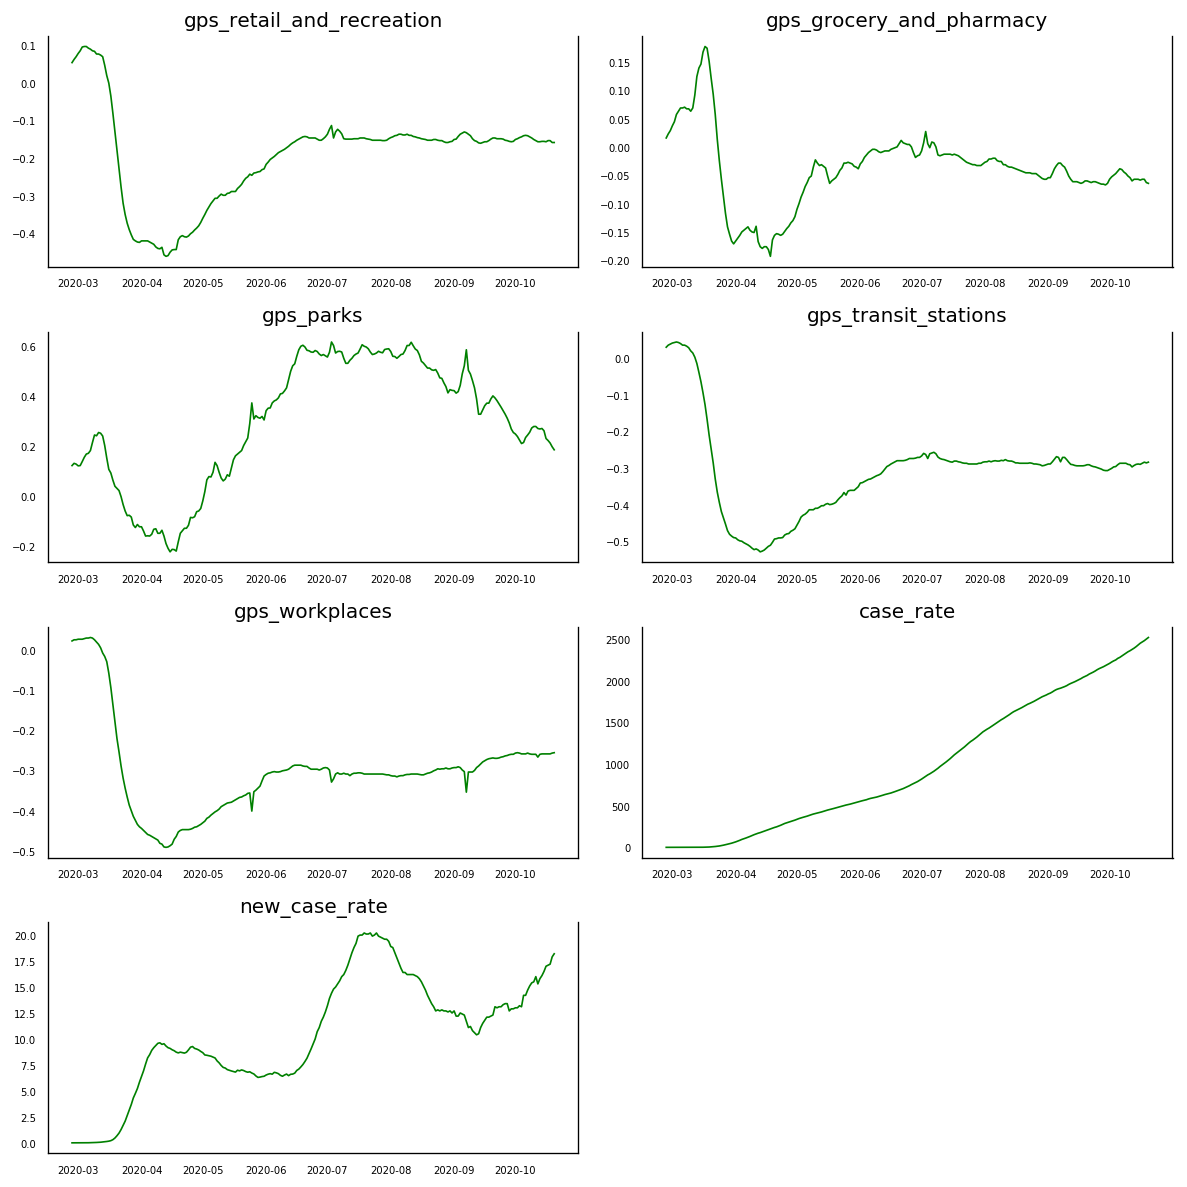

In [51]:
# Univariate Plots for each time series variables
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,10))
fig.delaxes(axes[3,1])
for i, ax in enumerate(fig.axes):
    data = lo3_m2_data[lo3_m2_data.columns[i]]
    ax.plot(data, color='green', linewidth=1)
    ax.set_title(lo3_m2_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/univar_plot_LO3_m2.png")
plt.show()

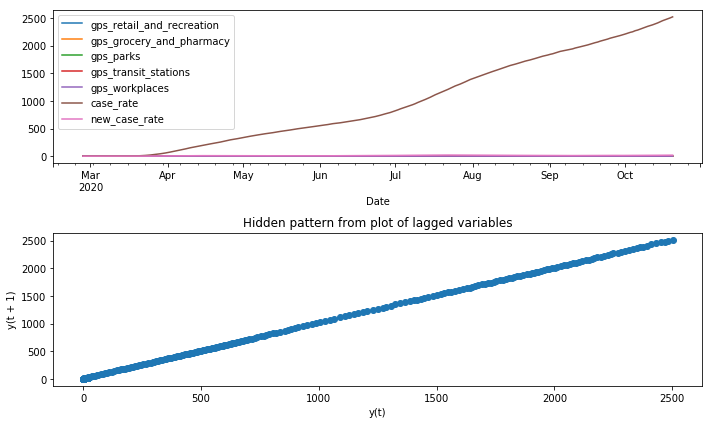

In [52]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
plt.title('Hidden pattern from plot of lagged variables')
lo3_m2_data.plot(ax=ax1)
panda.plotting.lag_plot(lo3_m2_data)
plt.tight_layout()
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/lag_plot_LO3_m2.png")
plt.show()

In [53]:
#Splitting the dataset into Train and Test series

lo3_m2_data_train = lo3_m2_data[:int(0.8*(len(lo3_m2_data)))]
lo3_m2_data_test = lo3_m2_data[int(0.8*(len(lo3_m2_data))):]

print("Dimension for the Training Dataset: ",lo3_m2_data_train.shape)
print("Dimension for the Testing Dataset: ",lo3_m2_data_test.shape)


Dimension for the Training Dataset:  (189, 7)
Dimension for the Testing Dataset:  (48, 7)


In [54]:
#Using function to run Augmented Dickey-Fuller Test (ADF Test) to check for stationarity in the dataset
from statsmodels.tsa.stattools import adfuller

def Stationary_test_ADF(dataset):
    for i in dataset.columns:
        print('\n\nADF test for Column '+i+':\n')
        adf_test = adfuller(dataset[i], autolag='AIC')
        adf = panda.Series(adf_test[0:4], index = ['Test Statistic :','p-value :','No_Lags :','No_Obsv :'])

        for key, value in adf_test[4].items():
           adf['Critical Value for (%s) : '%key] = value
        print (adf)
    return
        
    
Stationary_test_ADF(lo3_m2_data_train)




ADF test for Column gps_retail_and_recreation:

Test Statistic :                -3.478876
p-value :                        0.008546
No_Lags :                       12.000000
No_Obsv :                      176.000000
Critical Value for (1%) :       -3.468062
Critical Value for (5%) :       -2.878106
Critical Value for (10%) :      -2.575602
dtype: float64


ADF test for Column gps_grocery_and_pharmacy:

Test Statistic :                -2.788834
p-value :                        0.059887
No_Lags :                       11.000000
No_Obsv :                      177.000000
Critical Value for (1%) :       -3.467845
Critical Value for (5%) :       -2.878012
Critical Value for (10%) :      -2.575551
dtype: float64


ADF test for Column gps_parks:

Test Statistic :                -1.096741
p-value :                        0.716370
No_Lags :                        9.000000
No_Obsv :                      179.000000
Critical Value for (1%) :       -3.467420
Critical Value for (5%) :       -2.8778

In [55]:
# Differencing all variables to get rid of Stationarity
lo3_m2_train_diff_1 = lo3_m2_data_train.diff().dropna()
print('---------------------------------------After First Difference---------------------------------')
Stationary_test_ADF(lo3_m2_train_diff_1)


---------------------------------------After First Difference---------------------------------


ADF test for Column gps_retail_and_recreation:

Test Statistic :                -3.933092
p-value :                        0.001804
No_Lags :                        6.000000
No_Obsv :                      181.000000
Critical Value for (1%) :       -3.467005
Critical Value for (5%) :       -2.877644
Critical Value for (10%) :      -2.575355
dtype: float64


ADF test for Column gps_grocery_and_pharmacy:

Test Statistic :                -4.498668
p-value :                        0.000198
No_Lags :                        7.000000
No_Obsv :                      180.000000
Critical Value for (1%) :       -3.467211
Critical Value for (5%) :       -2.877735
Critical Value for (10%) :      -2.575403
dtype: float64


ADF test for Column gps_parks:

Test Statistic :                -2.978991
p-value :                        0.036904
No_Lags :                        8.000000
No_Obsv :                   

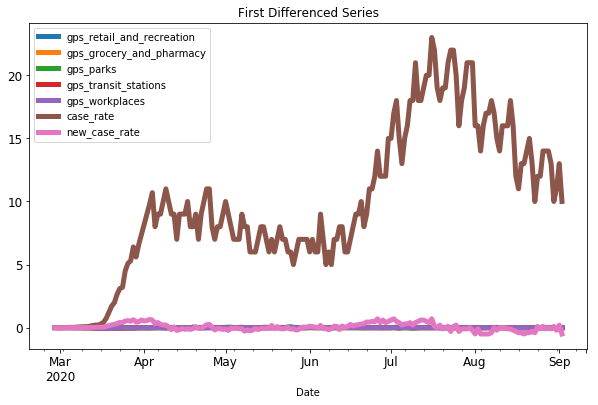

In [56]:
lo3_m2_train_diff_1.plot(figsize=(10,6),linewidth = 5, fontsize = 12)
plt.title("First Differenced Series")
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/I1_plot_LO3_m2.png")
plt.show()

In [57]:
lo3_m2_train_diff_2 = lo3_m2_train_diff_1.diff().dropna()
print('----------------------------------------After Second Difference---------------------------')
Stationary_test_ADF(lo3_m2_train_diff_2)



----------------------------------------After Second Difference---------------------------


ADF test for Column gps_retail_and_recreation:

Test Statistic :              -5.658213e+00
p-value :                      9.512242e-07
No_Lags :                      1.000000e+01
No_Obsv :                      1.760000e+02
Critical Value for (1%) :     -3.468062e+00
Critical Value for (5%) :     -2.878106e+00
Critical Value for (10%) :    -2.575602e+00
dtype: float64


ADF test for Column gps_grocery_and_pharmacy:

Test Statistic :              -6.875220e+00
p-value :                      1.480523e-09
No_Lags :                      9.000000e+00
No_Obsv :                      1.770000e+02
Critical Value for (1%) :     -3.467845e+00
Critical Value for (5%) :     -2.878012e+00
Critical Value for (10%) :    -2.575551e+00
dtype: float64


ADF test for Column gps_parks:

Test Statistic :              -7.114541e+00
p-value :                      3.861308e-10
No_Lags :                      1.000000e+0

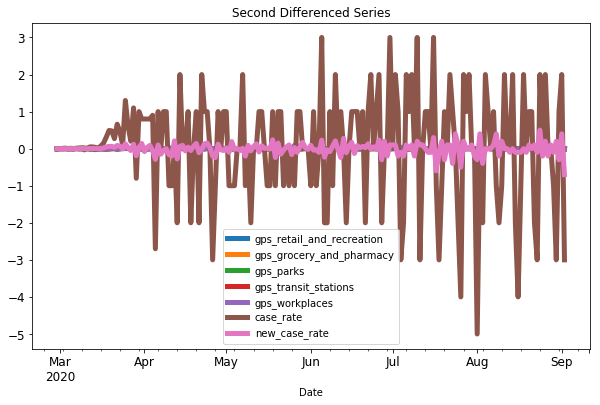

In [58]:
lo3_m2_train_diff_2.plot(figsize=(10,6),linewidth = 5, fontsize = 12)
plt.title("Second Differenced Series")
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/I2_plot_LO3_m2.png")
plt.show()

In [59]:
lo3_m2_train_diff_3 = lo3_m2_train_diff_2.diff().dropna()
print('----------------------------------After Third Difference---------------------------------')
Stationary_test_ADF(lo3_m2_train_diff_3)


----------------------------------After Third Difference---------------------------------


ADF test for Column gps_retail_and_recreation:

Test Statistic :              -6.735859e+00
p-value :                      3.208966e-09
No_Lags :                      1.300000e+01
No_Obsv :                      1.720000e+02
Critical Value for (1%) :     -3.468952e+00
Critical Value for (5%) :     -2.878495e+00
Critical Value for (10%) :    -2.575809e+00
dtype: float64


ADF test for Column gps_grocery_and_pharmacy:

Test Statistic :              -7.982062e+00
p-value :                      2.607400e-12
No_Lags :                      1.100000e+01
No_Obsv :                      1.740000e+02
Critical Value for (1%) :     -3.468502e+00
Critical Value for (5%) :     -2.878298e+00
Critical Value for (10%) :    -2.575704e+00
dtype: float64


ADF test for Column gps_parks:

Test Statistic :              -7.827311e+00
p-value :                      6.430149e-12
No_Lags :                      1.300000e+01

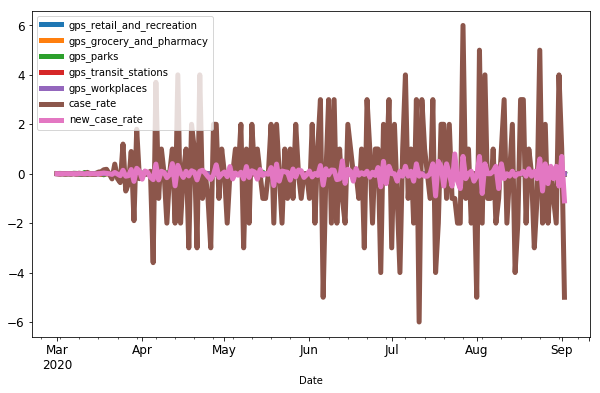

In [60]:
lo3_m2_train_diff_3.plot(figsize=(10,6),linewidth = 5, fontsize = 12)
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/I3_plot_LO3_m2.png")
plt.show()

In [61]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

#Using function to run cointegration test on all time series variables in the dataset.
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,1,3)
    eigens = out.lr2
    cvms = out.cvm[:, 1]

    print('TS variable  |    Max Eigen Test Statistic > or < C(95%)    |   Signif  \n')
    for col, eig, cvm in zip(df.columns, eigens, cvms):
        print(col, '-', round(eig,2), ">" if eig > cvm else "<", cvm, ' ->  ' , eig > cvm)


cointegration_test(lo3_m2_train_diff_3)

TS variable  |    Max Eigen Test Statistic > or < C(95%)    |   Signif  

gps_retail_and_recreation - 191.23 > 49.5875  ->   True
gps_grocery_and_pharmacy - 156.84 > 43.4183  ->   True
gps_parks - 138.11 > 37.1646  ->   True
gps_transit_stations - 126.06 > 30.8151  ->   True
gps_workplaces - 100.96 > 24.2522  ->   True
case_rate - 94.89 > 17.1481  ->   True
new_case_rate - 78.33 > 3.8415  ->   True


In [62]:
from statsmodels.tsa.stattools import grangercausalitytests

#Using function to run granger's causation matrix for time series variables in the dataset.
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = panda.DataFrame(nump.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=7, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(7)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = nump.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


grangers_causation_matrix(lo3_m2_train_diff_3, variables = lo3_m2_train_diff_3.columns) 


,gps_retail_and_recreation_x,gps_grocery_and_pharmacy_x,gps_parks_x,gps_transit_stations_x,gps_workplaces_x,case_rate_x,new_case_rate_x
gps_retail_and_recreation_y,1.0000,0.0000,0.0000,0.0892,0.0001,0.0785,0.6414
gps_grocery_and_pharmacy_y,0.0000,1.0000,0.0020,0.0945,0.0017,0.2194,0.5716
gps_parks_y,0.0000,0.0011,1.0000,0.0000,0.0000,0.3068,0.1613
gps_transit_stations_y,0.0890,0.0512,0.0112,1.0000,0.0078,0.2743,0.3447
gps_workplaces_y,0.0014,0.0013,0.0003,0.0002,1.0000,0.5411,0.0335
case_rate_y,0.0328,0.0325,0.1061,0.1142,0.6231,1.0000,0.0044
new_case_rate_y,0.1814,0.2207,0.0699,0.3825,0.1043,0.1743,1.0000


In [63]:
from statsmodels.tsa.vector_ar import vecm

vec_rank1 = vecm.select_coint_rank(lo3_m2_data_train, det_order = 1, k_ar_diff = 7, method = 'trace', signif=0.05)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   7          176.3          139.3
  1   7          115.0          107.3
  2   7          66.26          79.34
-------------------------------------


In [64]:
vec_rank2 = vecm.select_coint_rank(lo3_m2_data_train, det_order = 1, k_ar_diff = 7, method = 'maxeig', signif=0.05)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          61.34          49.59
  1   2          48.74          43.42
  2   3          24.03          37.16
-------------------------------------


In [65]:
vecm_model = vecm.VECM(endog = lo3_m2_data_train, k_ar_diff = 7, coint_rank = 3, deterministic = "ci")
vecm_model_fit = vecm_model.fit()
vecm_model_fit.predict(steps=len(lo3_m2_data_test))


array([[-1.45825670e-01, -5.47377269e-02,  4.07627954e-01,
        -2.85230924e-01, -2.86017415e-01,  1.86619126e+03,
         1.20229423e+01],
       [-1.43725149e-01, -5.65030815e-02,  4.09026931e-01,
        -2.84807751e-01, -2.86600439e-01,  1.87791839e+03,
         1.16538865e+01],
       [-1.40505039e-01, -5.88007561e-02,  4.19052592e-01,
        -2.81975356e-01, -2.81230731e-01,  1.88822546e+03,
         1.13665980e+01],
       [-1.32250107e-01, -5.48862368e-02,  4.16789817e-01,
        -2.77236604e-01, -2.77809787e-01,  1.89667654e+03,
         1.10185198e+01],
       [-1.26914313e-01, -5.06143938e-02,  4.26180065e-01,
        -2.73840902e-01, -2.72211297e-01,  1.90598465e+03,
         1.08176566e+01],
       [-1.20889824e-01, -4.49388577e-02,  4.32416236e-01,
        -2.70467820e-01, -2.71967937e-01,  1.91477917e+03,
         1.02468245e+01],
       [-1.20479585e-01, -4.71548463e-02,  4.37444577e-01,
        -2.67531176e-01, -2.64017577e-01,  1.92425702e+03,
         1.0087951

In [66]:
forecast, lower, upper = vecm_model_fit.predict(len(lo3_m2_data_test), 0.05)
forecast_df = panda.DataFrame(forecast, index = lo3_m2_data_test.index, columns=lo3_m2_data_test.columns+'_forecasted')
lower_df = panda.DataFrame(lower, index = lo3_m2_data_test.index, columns=lo3_m2_data_test.columns+'_lower')
upper_df = panda.DataFrame(upper, index = lo3_m2_data_test.index, columns=lo3_m2_data_test.columns+'_upper')


print('lower bounds of confidence intervals:')
print(lower.round(3))
print('\npoint forecasts:')
print(forecast.round(3))
print('\nupper bounds of confidence intervals:')
print(upper.round(3))

lower bounds of confidence intervals:
[[-1.540000e-01 -6.500000e-02  3.850000e-01 -2.910000e-01 -2.970000e-01
   1.864599e+03  1.180800e+01]
 [-1.560000e-01 -7.300000e-02  3.710000e-01 -2.940000e-01 -3.010000e-01
   1.875058e+03  1.126300e+01]
 [-1.560000e-01 -8.200000e-02  3.680000e-01 -2.960000e-01 -2.990000e-01
   1.883900e+03  1.076700e+01]
 [-1.520000e-01 -8.300000e-02  3.530000e-01 -2.960000e-01 -2.990000e-01
   1.890647e+03  1.017800e+01]
 [-1.520000e-01 -8.500000e-02  3.490000e-01 -2.990000e-01 -2.980000e-01
   1.898198e+03  9.728000e+00]
 [-1.540000e-01 -8.500000e-02  3.420000e-01 -3.030000e-01 -3.030000e-01
   1.905211e+03  8.898000e+00]
 [-1.620000e-01 -9.200000e-02  3.330000e-01 -3.090000e-01 -3.020000e-01
   1.912504e+03  8.429000e+00]
 [-1.660000e-01 -9.200000e-02  3.240000e-01 -3.150000e-01 -3.090000e-01
   1.919123e+03  7.670000e+00]
 [-1.740000e-01 -8.900000e-02  3.230000e-01 -3.220000e-01 -3.130000e-01
   1.926114e+03  7.101000e+00]
 [-1.830000e-01 -8.900000e-02  3.16

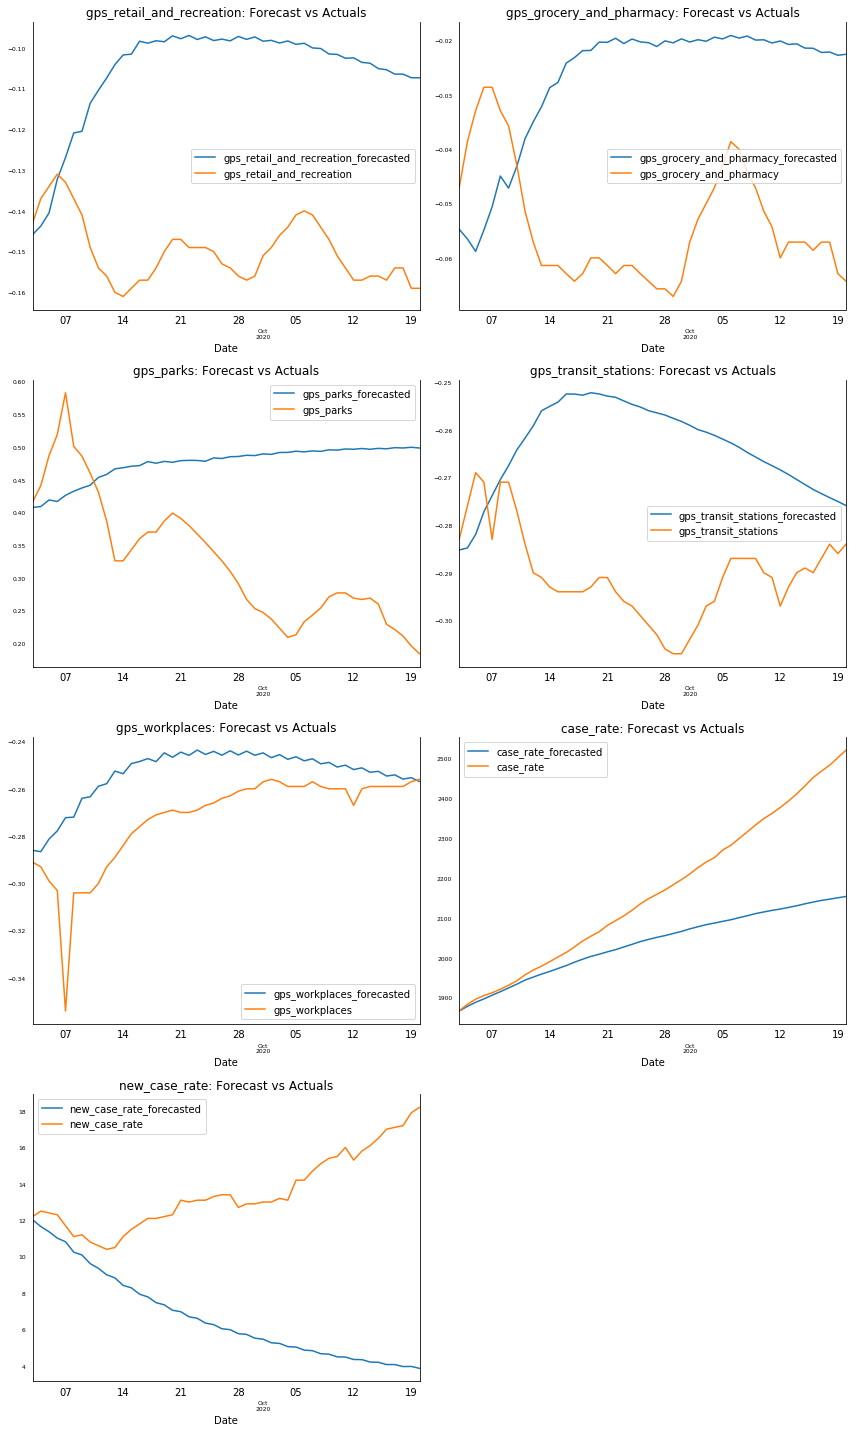

In [67]:
fig, axes = plt.subplots(4, 2, figsize=(12,20))

fig.delaxes(axes[3,1])
for i, (col,ax) in enumerate(zip(lo3_m2_data.columns, fig.axes)):
    forecast_df[col+'_forecasted'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    lo3_m2_data_test[col][-len(lo3_m2_data_test):].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/fc_Ac_LO3.png")
plt.show();

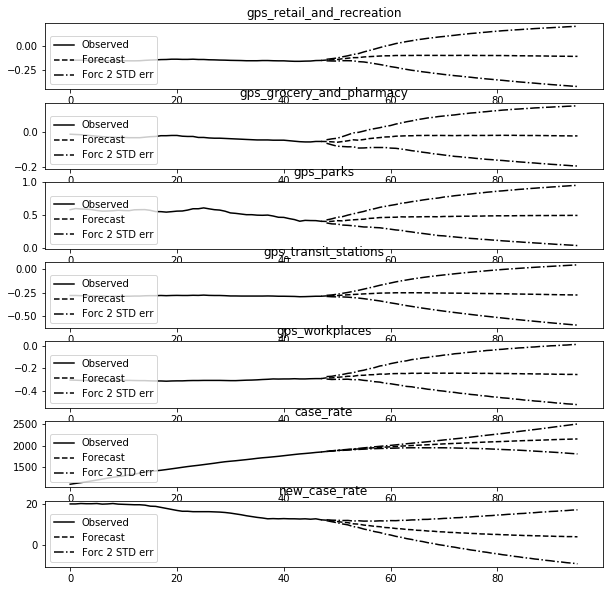

In [68]:
vecm_model_fit.plot_forecast(steps=len(lo3_m2_data_test), n_last_obs=len(lo3_m2_data_test))



In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def forecast_errors(fc_series,test_series):
    fc_errors = [test_series[i]-fc_series[i] for i in range(len(test_series))]
    bias = sum(fc_errors)*1.0/len(test_series)
    print(f'\n-> For Column "{test_series.name}":',"\n")
    print("  Bias:",bias)
    
    mae = mean_absolute_error(test_series,fc_series)
    print("\n  MAE:",mae)
    
    mse = mean_squared_error(test_series,fc_series)
    print("\n  MSE:",mse)
    
    print("\n  RMSE:",nump.sqrt(mse))
    
    return

for i in list(lo3_m2_data_test.columns):
    forecast_errors(forecast_df[i+'_forecasted'],lo3_m2_data_test[i])


-> For Column "gps_retail_and_recreation": 

  Bias: -0.04404423272894673

  MAE: 0.044765314578634585

  MSE: 0.0022599734104251194

  RMSE: 0.04753917763724063

-> For Column "gps_grocery_and_pharmacy": 

  Bias: -0.02682467092876406

  MAE: 0.03197046184187318

  MSE: 0.0011413580230093994

  RMSE: 0.03378399063179777

-> For Column "gps_parks": 

  Bias: -0.1491536903252357

  MAE: 0.17010384041766366

  MSE: 0.03638277819586952

  RMSE: 0.19074270155334783

-> For Column "gps_transit_stations": 

  Bias: -0.026748823458704496

  MAE: 0.02800926659439946

  MSE: 0.000992219752576003

  RMSE: 0.03149951987849978

-> For Column "gps_workplaces": 

  Bias: -0.01902315736408085

  MAE: 0.019061215638379453

  MSE: 0.0005629375230196284

  RMSE: 0.023726304453488504

-> For Column "case_rate": 

  Bias: 129.64682395324644

  MAE: 129.64682395324644

  MSE: 29071.641288987652

  RMSE: 170.50407997754087

-> For Column "new_case_rate": 

  Bias: 6.809362156586476

  MAE: 6.80936215658647